In [ ]:
import ssl

If you're working in a trusted environment and want to bypass SSL verification (not recommended for sensitive data), you can disable SSL verification, idk what excatly it is but it was asking for verification when i tried downloading data

In [ ]:
from urllib.request import urlretrieve

In [ ]:
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1fa655ec2d0>)

In [112]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [113]:
import pandas as pd

In [114]:
medical_df = pd.read_csv('medical.csv')

In [115]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [116]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like "age", "children", "bmi" (body mass index) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

In [117]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

In [118]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

to explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization. also that last ;ine insures that all the chats are shown in the jupyter notebook and not as popups.

In [119]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

this will improve the default style and font sizes for our charts

In [120]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [121]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.write_html("assets/age_distribution.html")
fig.show()

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn. that marginal = box shows median and similar parameters in a box above whuich is interactive

In [122]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.write_html("assets/bmi_distribution.html")
fig.show()

Anything below an 18.5 is considered underweight, 18.5 to 24.9 is a normal weight range, 25.0 to 19.9 is considered overweight or pre-obese, and 30 or higher is obese. The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

In [123]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.write_html("assets/annual_charges.html")
fig.show()

In [124]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['yellow', 'grey'], 
                   title='Annual Medical Charges according to Sex')
fig.update_layout(bargap=0.1)
fig.write_html("assets/annual_charges_sex.html")
fig.show()

In [125]:
fig = px.histogram(medical_df, 
                   x='charges',  
                   color='region', 
                   color_discrete_sequence=['pink', 'grey', 'green', 'red'], 
                   title='Annual Medical Charges according to region')
fig.update_layout(bargap=0.1)
fig.write_html("assets/annual_charges_region.html")
fig.show()

In [126]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [127]:
fig = px.histogram(medical_df, x='smoker', color='sex', title='Smoker')
fig.write_html("assets/smoker.html")
fig.show()

In [128]:
fig = px.scatter(medical_df, 
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,#to add colour oppacity for variation
                 hover_data=['sex'],
                 title = 'age vs charges')
fig.update_traces(marker_size = 5)
fig.write_html("assets/age_charges.html")
fig.show()

you can turn off and on the yes no with a single click plotly graph to study and observe it better.
so we can observe that non-smokers mostly have less expenses as compared to a smoker.

In [129]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title = 'BMI vs charges')
fig.update_traces(marker_size=5)
fig.write_html("assets/bmi_charges.html")
fig.show()

so smoking with high bmi has more charges.

In [130]:
fig = px.violin(medical_df,
                 x='children',
                 y='charges',
                 color='sex',
                 title = 'Children vs Charges')
fig.write_html("assets/children_charges.html")
fig.show()

sns.barplot can use this as well

In [131]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [132]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

this corr thing is to see correlation between the two variables, we see that corelation between charges and age is more than that of chares and bmi. it shows strength and direction in the graph
correlation graph to understand the output better
https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.istockphoto.com%2Fphotos%2Fcorrelation-graph&psig=AOvVaw3p-syYDUvMl5fETVZ055Pl&ust=1744562589413000&source=images&cd=vfe&opi=89978449&ved=0CBEQjRxqFwoTCKiG55740owDFQAAAAAdAAAAABAE

In [133]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790477)

we have to compute categorical data to numerical to compute correlation between them or with them

In [134]:
medical_df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [135]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values) #this means that smoker numeric will be mapped as 0 and 1 from smoker values
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

all yess no is converted

In [136]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984773)

In [137]:
px.scatter(medical_df, x='age', y='age')

correlation of age with age is perfect

In [138]:
#medical_df.corr()
medical_df.select_dtypes(include="number").corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#medical_df.corr()
The problem only lies in the one function corr() which is not deprecated but its numeric_only Argument in the function is. So, you can set it to false or true according to needs by df.corr(numeric_only = *[True/False]*).
numeric values can also be selected as shown above

In [139]:
medical_df.corr(numeric_only = True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

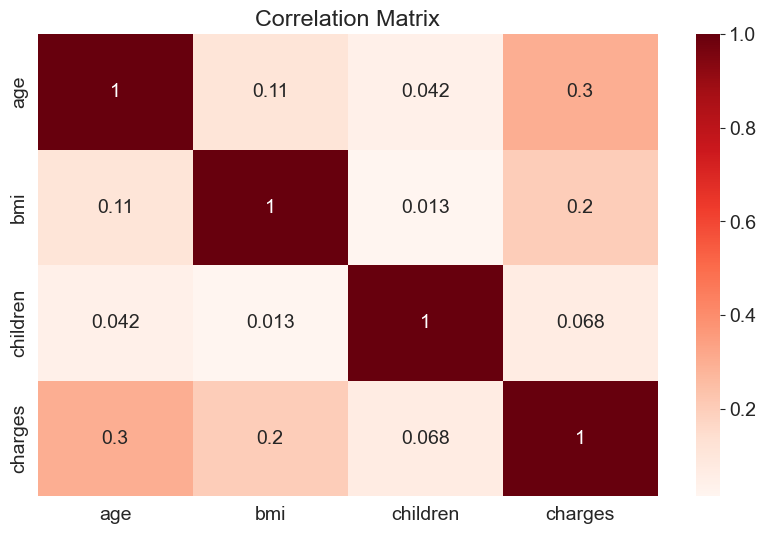

In [140]:
sns.heatmap(medical_df.corr(numeric_only= True), cmap = 'Reds', annot = True)
plt.title('Correlation Matrix')

this heatmap shows age and charges have higher correlation

data frame for non smokers then well deal with smokers later on

In [141]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

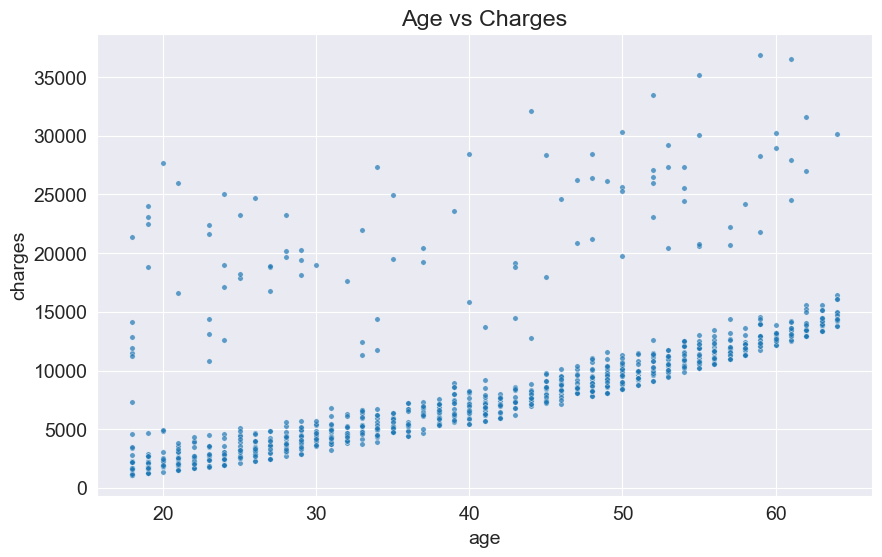

In [142]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s=15);

using these lines we try to fit a line and then using that as reference y = mx + c == charges = m*age + b(intercept)
this is linear regression and we try to fing  m and c that best fitd the data

In [143]:
def estimate_charges(age, m, c):
    return m * age + c

In [144]:
m = 50
c = 100

In [145]:
estimate_charges(40, m, c)

2100

as we can see the estimate is bad i.e it is low from the above graph

In [146]:
ages = non_smoker_df.age
ages
#list of all th ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [147]:
estimate_charges = estimate_charges(ages, m, c)
estimate_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [148]:
non_smoker_df.charges
#actual charges as we can see the estimation is very bad

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

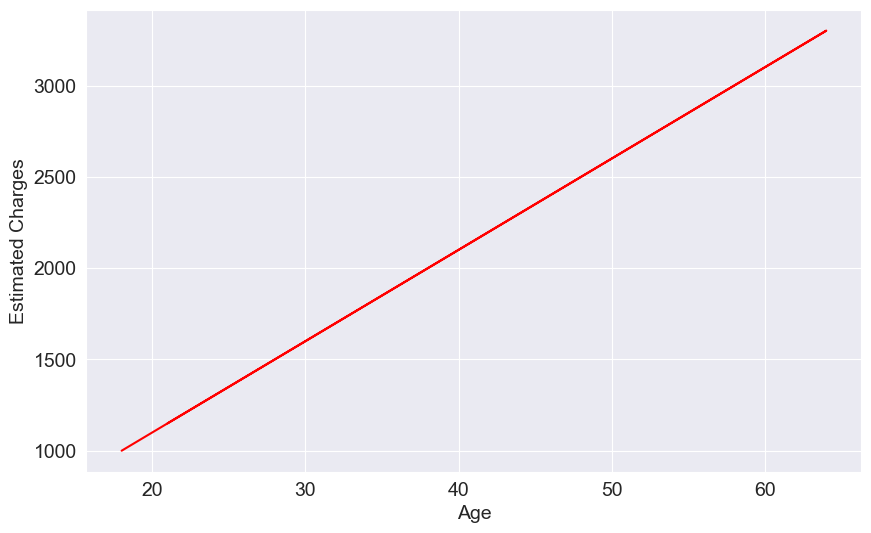

In [149]:
#plotting the estimated charges using scatter plot
plt.plot(ages, estimate_charges, 'r-'); #r-o gives red dots in this line and r- gives only line
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

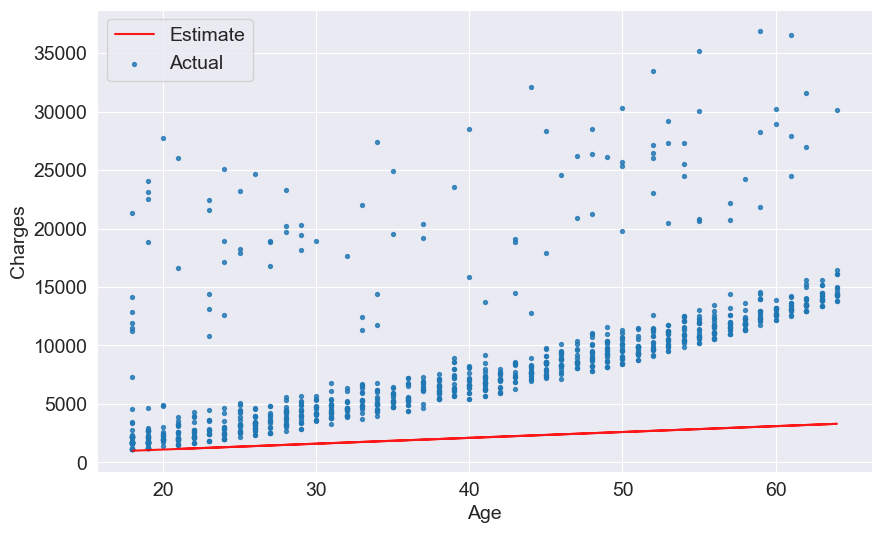

In [150]:
target = non_smoker_df.charges

plt.plot(ages, estimate_charges, 'r', alpha = 0.9)

plt.scatter(ages, target, s=8, alpha = 0.8)

plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', "Actual"])

#comparision of actual charges to estimated one

In [151]:
print(type(estimate_charges))


<class 'pandas.core.series.Series'>


In [157]:
def estimate_chargess(age, a, b):
    return a * age + b

In [158]:
def try_parameters(a, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges



    estimated_charges = estimate_chargess(ages, a, b)

    plt.plot(ages, estimated_charges, 'r', alpha = 0.9);
    plt.scatter(ages, target, s = 8, alpha = 0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

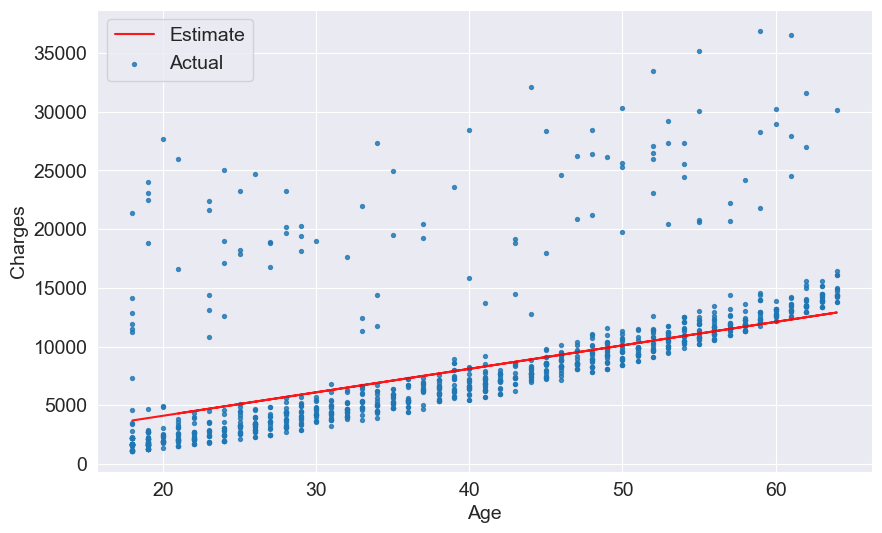

In [159]:
try_parameters(200, 100)

In [154]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [161]:
predictions = estimate_chargess
predictions

<function __main__.estimate_chargess(age, a, b)>

lost/cost function
gives root mean sq error, in this the prediction of the model is substracted from actual result or target then squared  and then divided by total number of entries and finally sq root is taken
rmse = √((prediction-target)²/n)
this is to find out how much error is there in the model or how bad our model is

In [156]:
pip install numpy

^C
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 724.9 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 882.7 kB/s eta 0:00:02
   ---------------------- ----------------- 1.0/1.8 MB 861.7 kB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 994.5 kB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 1.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
Note: you may need to restart the kerne

In [ ]:
import numpy as np

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [168]:
a = 200
b = 100

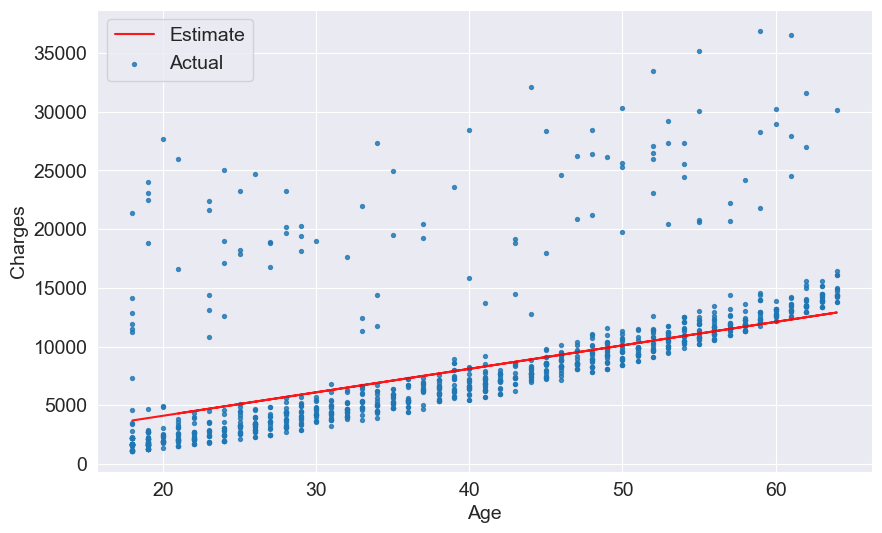

In [169]:
try_parameters(a, b)

In [171]:
targets = non_smoker_df['charges']
predictions = estimate_chargess(non_smoker_df.age, a, b)

In [ ]:
rmse(targets, predictions) # this is the error

np.float64(4779.5540037235605)